In [4]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv(r"LAST_Merged.csv")
df.head()

,artist,track,genre,streams_2025,daily,album_name,release_date,isrc,all_time_rank,track_score,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,The Weeknd,Blinding Lights,R&B,4817515497,1430085.0,Blinding Lights,2019-11-29,USUG11904206,56.0,194.0,...,1695240.0,1116.0,564.0,11701129.0,184.0,489299762.0,319634.0,28659471.0,28994660.0,0.0
1,Ed Sheeran,Shape of You,Pop/Rock,4337398717,1403547.0,Shape of You,2017-01-06,GBAHS1600463,54.0,195.1,...,402829.0,282.0,512.0,2710931.0,115.0,733565655.0,651557.0,78149375.0,1146246.0,0.0
2,Lewis Capaldi,Someone You Loved,Pop/Rock,3886634766,1172273.0,Breach,2018-11-08,DEUM71807062,133.0,129.7,...,600211.0,381.0,502.0,4834088.0,110.0,427212257.0,357540.0,0.0,29266297.0,0.0
3,The Weeknd,Starboy,R&B,3868033171,1616208.0,Starboy,2016-09-22,USUG11600976,265.0,95.7,...,68441.0,148.0,118.0,875683.0,67.0,331295154.0,418888.0,23612071.0,15648166.0,1.0
4,Harry Styles,As It Was,Pop/Rock,3856873043,1283976.0,As It Was,2022-03-31,USSM12200612,20.0,292.0,...,1777811.0,4909.0,330.0,12907852.0,189.0,132624772.0,79909.0,0.0,14967379.0,0.0


## Is there a relationship between a song being explicit and its Spotify popularity level?

**H0** (Null Hypothesis) = There is NO relationship between the spotify popularity level and the song being explicit, at 5% significant level<br>,  ( the two variables are independent)

**H1** (Alternate Hypothesis) = There is a relationship between the spotify popularity level and the song being explicit, at 5% significant level.   ( the two variables are dependent)

### Chi-Square test

In [6]:
df['spotify_popularity'].unique()

array([83., 80., 82., 84., 87., 85., 81., 71., 78., 86., 77., 88., 67.,
       76., 79., 75., 69., 92., 16.,  0., 24., 73., 95., 60., 49., 72.,
       74., 25., 70., 55., 43., 64., 68., 63., 53., 37., 47., 90.,  6.,
       29., 12., 18., 65., 96., 62., 66., 15., 14., 59., 27., 40., 61.,
       57., 31., 10., 42., 56.,  1., 21., 45., 51., 46., 28., 54., 20.])

In [7]:
label = ['Level 10', 'Level 9', 'Level 8', 'Level 7', 'Level 6', 'Level 5', 'Level 4', 'Level 3', 'Level 2', 'Level 1']
df['spotify_popularity_level'] = pd.cut(df['spotify_popularity'], bins=10, labels=label, include_lowest=True)

In [8]:
df['spotify_popularity_level'].unique()

['Level 2', 'Level 1', 'Level 3', 'Level 4', 'Level 9', 'Level 10', 'Level 8', 'Level 5', 'Level 6', 'Level 7']
Categories (10, object): ['Level 10' < 'Level 9' < 'Level 8' < 'Level 7' ... 'Level 4' < 'Level 3' < 'Level 2' < 'Level 1']

In [10]:
df2 = pd.DataFrame({'popularity_level': df['spotify_popularity_level'], 'explicit': df['explicit_track']})

In [11]:
df2.head()

,popularity_level,explicit
0,Level 2,0.0
1,Level 2,0.0
2,Level 2,0.0
3,Level 2,1.0
4,Level 1,0.0


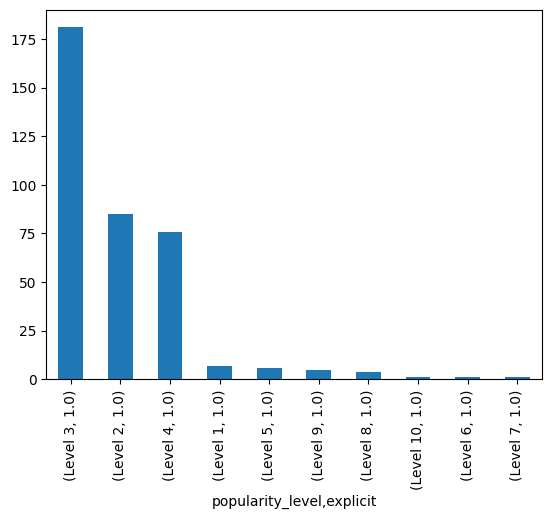

In [12]:
df2[df2['explicit']==1].value_counts().plot(kind='bar');

## Step 1: Collect observed frequency data

In [13]:
rows=df2['popularity_level'].unique().sort_values(ascending=False)
cols=df2['explicit'].unique()

In [14]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        l.append(len(df2[(df2['popularity_level']==i) & (df2['explicit']==j)]))
    matrix.append(l)
matrix

[[15, 7],
 [169, 85],
 [345, 181],
 [128, 76],
 [6, 6],
 [7, 1],
 [4, 1],
 [2, 4],
 [6, 5],
 [13, 1]]

In [15]:
values = pd.DataFrame(matrix,index=rows,columns=cols)

In [16]:
values

,0.0,1.0
Level 1,15,7
Level 2,169,85
Level 3,345,181
Level 4,128,76
Level 5,6,6
Level 6,7,1
Level 7,4,1
Level 8,2,4
Level 9,6,5
Level 10,13,1


In [17]:
values.sum()

0.0    695
1.0    367
dtype: int64

In [18]:
values.loc['Total'] = values.sum()

In [19]:
values

,0.0,1.0
Level 1,15,7
Level 2,169,85
Level 3,345,181
Level 4,128,76
Level 5,6,6
Level 6,7,1
Level 7,4,1
Level 8,2,4
Level 9,6,5
Level 10,13,1


In [20]:
values['Total'] = values.sum(axis=1)

In [21]:
values

,0.0,1.0,Total
Level 1,15,7,22
Level 2,169,85,254
Level 3,345,181,526
Level 4,128,76,204
Level 5,6,6,12
Level 6,7,1,8
Level 7,4,1,5
Level 8,2,4,6
Level 9,6,5,11
Level 10,13,1,14


## Step2: Calculate expected frequency data

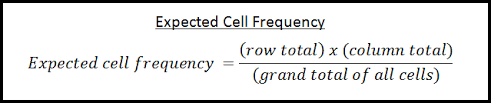

In [22]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(values.loc[i,'Total']*values.loc['Total',j])/values.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

[[np.float64(14.397363465160076), np.float64(7.602636534839925)],
 [np.float64(166.2241054613936), np.float64(87.77589453860641)],
 [np.float64(344.22787193973636), np.float64(181.77212806026364)],
 [np.float64(133.50282485875707), np.float64(70.49717514124293)],
 [np.float64(7.853107344632768), np.float64(4.146892655367232)],
 [np.float64(5.235404896421845), np.float64(2.7645951035781544)],
 [np.float64(3.2721280602636535), np.float64(1.7278719397363465)],
 [np.float64(3.926553672316384), np.float64(2.073446327683616)],
 [np.float64(7.198681732580038), np.float64(3.8013182674199624)],
 [np.float64(9.16195856873823), np.float64(4.83804143126177)]]

In [23]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

,0.0,1.0
Level 1,14.397363,7.602637
Level 2,166.224105,87.775895
Level 3,344.227872,181.772128
Level 4,133.502825,70.497175
Level 5,7.853107,4.146893
Level 6,5.235405,2.764595
Level 7,3.272128,1.727872
Level 8,3.926554,2.073446
Level 9,7.198682,3.801318
Level 10,9.161959,4.838041


In [24]:
values.drop('Total',axis=1,inplace=True)
values.drop('Total',axis=0,inplace=True)

In [25]:
values

,0.0,1.0
Level 1,15,7
Level 2,169,85
Level 3,345,181
Level 4,128,76
Level 5,6,6
Level 6,7,1
Level 7,4,1
Level 8,2,4
Level 9,6,5
Level 10,13,1


### Step 3 Freedom Degrees

In [26]:
expectedF.shape

(10, 2)

In [27]:
freeDom=(expectedF.shape[0]-1)*(expectedF.shape[1]-1)
freeDom

9

### Step 4 Calculate the chi square

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiY4aA2NBkACxANJ-Wo-y17Yaw-RgyV6cf_w&usqp=CAU'>

In [28]:
chiScoreTable=pd.DataFrame(values.values.flatten(),columns=['O'])
chiScoreTable

,O
0,15
1,7
2,169
3,85
4,345
5,181
6,128
7,76
8,6
9,6


In [29]:
chiScoreTable['E']=expectedF.values.flatten()
chiScoreTable

,O,E
0,15,14.397363
1,7,7.602637
2,169,166.224105
3,85,87.775895
4,345,344.227872
5,181,181.772128
6,128,133.502825
7,76,70.497175
8,6,7.853107
9,6,4.146893


In [30]:
chiScoreTable['O-E']=chiScoreTable['O']-chiScoreTable['E']
chiScoreTable

,O,E,O-E
0,15,14.397363,0.602637
1,7,7.602637,-0.602637
2,169,166.224105,2.775895
3,85,87.775895,-2.775895
4,345,344.227872,0.772128
5,181,181.772128,-0.772128
6,128,133.502825,-5.502825
7,76,70.497175,5.502825
8,6,7.853107,-1.853107
9,6,4.146893,1.853107


In [31]:
chiScoreTable['(O-E)^2']=chiScoreTable['O-E']**2
chiScoreTable

,O,E,O-E,(O-E)^2
0,15,14.397363,0.602637,0.363171
1,7,7.602637,-0.602637,0.363171
2,169,166.224105,2.775895,7.705590
3,85,87.775895,-2.775895,7.705590
4,345,344.227872,0.772128,0.596182
5,181,181.772128,-0.772128,0.596182
6,128,133.502825,-5.502825,30.281081
7,76,70.497175,5.502825,30.281081
8,6,7.853107,-1.853107,3.434007
9,6,4.146893,1.853107,3.434007


In [32]:
chiScoreTable['((O-E)^2)/E']=chiScoreTable['(O-E)^2']/chiScoreTable['E']
chiScoreTable

,O,E,O-E,(O-E)^2,((O-E)^2)/E
0,15,14.397363,0.602637,0.363171,0.025225
1,7,7.602637,-0.602637,0.363171,0.047769
2,169,166.224105,2.775895,7.705590,0.046357
3,85,87.775895,-2.775895,7.705590,0.087787
4,345,344.227872,0.772128,0.596182,0.001732
5,181,181.772128,-0.772128,0.596182,0.003280
6,128,133.502825,-5.502825,30.281081,0.226820
7,76,70.497175,5.502825,30.281081,0.429536
8,6,7.853107,-1.853107,3.434007,0.437280
9,6,4.146893,1.853107,3.434007,0.828092


In [33]:
chiScore=chiScoreTable['((O-E)^2)/E'].sum()
chiScore

np.float64(12.288917313445316)

#### If the chi square exceeds the table value the null hypothesis should be rejected.

<img src='https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg'>

### Freedom = 9, 5% significant level and Chi score = 12.288

In [34]:
TabularValue = 16.919

In [35]:
TabularValue,chiScore

(16.919, np.float64(12.288917313445316))

#### Chi value "12.288" < Tabular value "16.919" so we accept the null hypothesis